In [233]:
import numpy as np
import matplotlib.pyplot as plt

1- DataSets :

In [234]:
from sklearn.datasets import make_regression

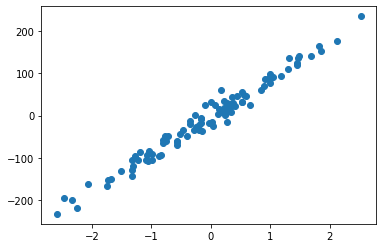

In [235]:
x,y = make_regression(n_samples=100, n_features=1, noise=15)
y=y.reshape(x.shape)
plt.scatter(x,y)

In [236]:
#matrix X
X = np.hstack((x, np.ones(x.shape)))
X

array([[-1.32692789,  1.        ],
       [ 0.2363756 ,  1.        ],
       [-1.68239418,  1.        ],
       [ 1.44992444,  1.        ],
       [ 1.68662229,  1.        ],
       [-0.71918099,  1.        ],
       [-0.56671849,  1.        ],
       [ 0.52483236,  1.        ],
       [ 0.21338852,  1.        ],
       [-1.05548381,  1.        ],
       [ 0.37180829,  1.        ],
       [-0.09046971,  1.        ],
       [ 0.35462321,  1.        ],
       [ 0.25727955,  1.        ],
       [ 0.27423644,  1.        ],
       [ 0.97796733,  1.        ],
       [-0.764393  ,  1.        ],
       [ 1.84700736,  1.        ],
       [-0.51878494,  1.        ],
       [-2.59257637,  1.        ],
       [-0.99166057,  1.        ],
       [-1.31819672,  1.        ],
       [-0.03497801,  1.        ],
       [-0.87779609,  1.        ],
       [ 0.41209743,  1.        ],
       [-0.98930178,  1.        ],
       [-0.35265371,  1.        ],
       [ 1.30765677,  1.        ],
       [ 0.25604895,

In [237]:
#Vector theta

theta = np.random.randn(2,1)
theta

array([[-0.00301264],
       [-0.13811135]])

Model

In [238]:
def model(X, theta):
    return X.dot(theta)

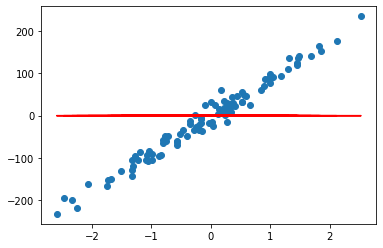

In [239]:
plt.scatter(x,y)
plt.plot(x,model(X, theta), c="r")

# Cost function (fonction de cout)

In [240]:
def cost_function(X,theta, y):
    m=len(y)
    return 1/(2*m) * ((model(X, theta) - y)**2).sum()

In [241]:
cost_function(X, theta, y)

4252.774375164506

Gradient et descente de gradient :

In [242]:
def grad(X, y, theta) :
    m=len(y)
    return 1/m * ( X.T.dot( model(X, theta) - y) )

In [243]:
grad(X, y, theta).shape

(2, 1)

In [244]:
# learning_rate = alpha
def gradient_descent(X, y,theta, learning_rate, n_iterations):
    cost_history=[]
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X,y, theta)
        cost_history.append(cost_function(X,theta=theta, y=y))

    return theta, cost_history

# Maching learnin !

In [245]:
theta_final , cost_history= gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
theta_final

array([[87.04248474],
       [-1.43501058]])

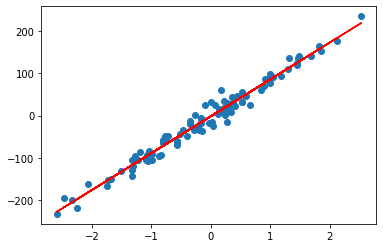

In [246]:
prediction = model(X, theta_final)

plt.scatter(x,y)
plt.plot(x, prediction, c='r')

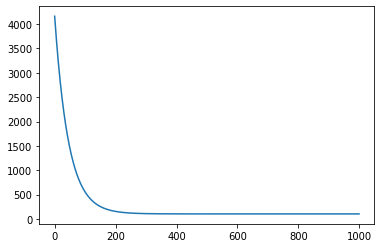

In [247]:
plt.plot(np.arange(len(cost_history)), cost_history)

Coefficient de determiniation :

In [248]:
def coef_determination(y, pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()

    return 1- u/v

In [249]:
coef_determination(y, prediction)

0.9752090603281036